In [1]:
import csv


enrollments_filename = 'E:\udacity\data analyst\lesson2\part1\enrollments.csv'
engagement_filename = 'E:\udacity\data analyst\lesson2\part1\daily_engagement.csv'
submissions_filename = 'E:\udacity\data analyst\lesson2\part1\project_submissions.csv'

In [2]:
def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = csv.DictReader(f)
        return list(reader)

enrollments = read_csv(enrollments_filename)
daily_engagement = read_csv(engagement_filename)
project_submissions = read_csv(submissions_filename)


In [3]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]
        

{'account_key': '448',
 'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 'days_to_cancel': 65,
 'is_canceled': True,
 'is_udacity': True,
 'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 'status': 'canceled'}

In [4]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{'acct': '0',
 'lessons_completed': 0,
 'num_courses_visited': 1,
 'projects_completed': 0,
 'total_minutes_visited': 11.6793745,
 'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [5]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{'account_key': '256',
 'assigned_rating': 'UNGRADED',
 'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 'lesson_key': '3176718735',
 'processing_state': 'EVALUATED'}

In [6]:
for line in daily_engagement:
    line['account_key']=line['acct']
    del[line['acct']]

In [7]:
def unique_student(data):
    unique=set()
    for line in data:
        unique.add(line['account_key'])
    return unique
def number_unique_student(filename):
    print "number of data: "+str(len(filename))
    print "number of unique students: "+str(len(unique_student(filename)))

number_unique_student(enrollments)
number_unique_student(daily_engagement)
number_unique_student(project_submissions)

number of data: 1640
number of unique students: 1302
number of data: 136240
number of unique students: 1237
number of data: 3642
number of unique students: 743


In [8]:
surprising_data =[]
for line in enrollments:
    student = line['account_key']
    if student not in unique_student(daily_engagement):
#        print line
#        break
        surprising_data.append(line)
print "number different :"+str(len(surprising_data))

number different :71


In [9]:
num_problem_students=0

for line in surprising_data:
    join = line['join_date']

    quit = line['cancel_date']
    if join !=quit:
        print line
        num_problem_students +=1
print "numbers of problem student "+str(num_problem_students)

{'status': 'canceled', 'is_udacity': True, 'is_canceled': True, 'join_date': datetime.datetime(2015, 1, 10, 0, 0), 'account_key': '1304', 'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), 'days_to_cancel': 59}
{'status': 'canceled', 'is_udacity': True, 'is_canceled': True, 'join_date': datetime.datetime(2015, 3, 10, 0, 0), 'account_key': '1304', 'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), 'days_to_cancel': 99}
{'status': 'current', 'is_udacity': True, 'is_canceled': False, 'join_date': datetime.datetime(2015, 2, 25, 0, 0), 'account_key': '1101', 'cancel_date': None, 'days_to_cancel': None}
numbers of problem student 3


In [10]:
udacity_test_accounts=set()
for line in enrollments:
    if line['is_udacity']:
        udacity_test_accounts.add(line['account_key'])
print "is udacity account:"
print len(udacity_test_accounts)

is udacity account:
6


In [11]:
def remove_udacity_accounts(data):
    non_udacity_data=[]
    for line in data:
        if line['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(line)
    return non_udacity_data

In [12]:
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)
print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


In [13]:
paid_students={}
for line in non_udacity_enrollments:
    if not line['is_canceled'] or line['days_to_cancel'] > 7:
        account_key=line['account_key']
        enrollment_data=line['join_date']
        if (account_key not in paid_students or enrollment_data>paid_students[account_key]):
            paid_students[account_key]=enrollment_data
print "number of student paid"
print len(paid_students)

number of student paid
995


In [14]:
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days>=0

In [15]:
def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

In [16]:
paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)
print len(paid_enrollments)
print len(paid_engagement)
print len(paid_submissions)

1293
134549
3618


In [17]:
paid_engagement_in_first_week = []

for line in paid_engagement:
    account_key = line['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = line['utc_date']

    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(line) 
        
print len(paid_engagement_in_first_week)
        

6919


In [18]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [19]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [20]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()
print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


In [21]:
student_with_max_minutes = None
max_minutes = 0

for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student

max_minutes

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        print engagement_record

{'lessons_completed': 4, 'num_courses_visited': 4, 'total_minutes_visited': 850.519339666, 'projects_completed': 0, 'account_key': '163', 'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}
{'lessons_completed': 6, 'num_courses_visited': 6, 'total_minutes_visited': 872.633923334, 'projects_completed': 0, 'account_key': '163', 'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}
{'lessons_completed': 6, 'num_courses_visited': 2, 'total_minutes_visited': 777.018903666, 'projects_completed': 0, 'account_key': '163', 'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}
{'lessons_completed': 2, 'num_courses_visited': 1, 'total_minutes_visited': 294.568774, 'projects_completed': 0, 'account_key': '163', 'utc_date': datetime.datetime(2015, 7, 12, 0, 0)}
{'lessons_completed': 1, 'num_courses_visited': 3, 'total_minutes_visited': 471.2139785, 'projects_completed': 0, 'account_key': '163', 'utc_date': datetime.datetime(2015, 7, 13, 0, 0)}
{'lessons_completed': 1, 'num_courses_visited': 2, 'total_minutes_

In [22]:
from collections import defaultdict
def group_data(data,key_name):
    grouped_data=defaultdict(list)
    for data_point in data:
        key=data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

In [23]:
engagement_by_account= group_data(paid_engagement_in_first_week,'account_key')

In [24]:
def sum_grouped_items(grouped_data, field_name):
    summed_data={}
    for key, data_point in grouped_data.items():
        total_summed_data=0
        for a in data_point:
            total_summed_data+= a[field_name]
        summed_data[key]=total_summed_data
    return summed_data    

In [25]:
lessons_completed_by_account =sum_grouped_items(engagement_by_account, 'lessons_completed')


In [26]:
# Summarize the data about minutes spent in the classroom
def analys (total):
    import numpy as np
#    %matplotlib inline  
#    import matplotlib.pyplot as plt

    print 'Mean:', np.mean(total)
    print 'Standard deviation:', np.std(total)
    print 'Minimum:', np.min(total)
    print 'Maximum:', np.max(total)
#    plt.hist(total)

In [27]:
analys(lessons_completed_by_account.values())

Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


In [28]:
for line in paid_engagement:
    if line['num_courses_visited']>0:
        line['has_visited']=1
    else:
        line['has_visited']=0

In [29]:
days_visited_by_account=sum_grouped_items(engagement_by_account,'has_visited')

In [30]:
analys(days_visited_by_account.values())

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


In [32]:
subway_project_lesson_keys=['746169184','3176718735']

passing_engagement =0
non_passing_engagement =0


In [33]:
subway_project_lesson_keys=['746169184','3176718735']
pass_subway_project=set()
passing_engagement =[]
non_passing_engagement =[]
for line in paid_submissions:
    if line['lesson_key'] in subway_project_lesson_keys:
        if line['assigned_rating']=='PASSED' or line['assigned_rating']=='DISTINCTION':
            pass_subway_project.add(line['account_key'])
print len(pass_subway_project)

for data in paid_engagement_in_first_week:
    if data['account_key'] in pass_subway_project:
        passing_engagement.append(data)
    else:
        non_passing_engagement.append(data)
print len(passing_engagement)
print len(non_passing_engagement)
          
    

647
4527
2392


In [34]:
print passing_engagement[0]

{'lessons_completed': 0, 'num_courses_visited': 1, 'has_visited': 1, 'total_minutes_visited': 11.6793745, 'projects_completed': 0, 'account_key': '0', 'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}


In [35]:
#print "passing_engagement:"
#analys(sum_grouped_items(group_data(passing_engagement,'account_key'),'total_minutes_visited').values())


In [36]:
#print "non_passing_engagement:"
#analys(sum_grouped_items(group_data(non_passing_engagement,'account_key'),'total_minutes_visited').values())

In [37]:
def comparing_pass_non_pass(item):
    print item, "\n"
    print "passing_engagement:"
    analys(sum_grouped_items(group_data(passing_engagement,'account_key'),item).values())
    print "non_passing_engagement:"
    analys(sum_grouped_items(group_data(non_passing_engagement,'account_key'),item).values())
    print "\n\n"


In [38]:
comparing_pass_non_pass('total_minutes_visited')


total_minutes_visited 

passing_engagement:
Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645
non_passing_engagement:
Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933





In [39]:
#%matplotlib inline
#import matplotlib.pyplot as plt
#plt.hist(data)

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [44]:
passed=defaultdict(list)
passed['passing_engagement']=passing_enegagement

NameError: name 'passing_enegagement' is not defined

In [41]:
def graph_hist(pass_or_not, subject):
 
    plt.hist(sum_grouped_items(group_data(pass_or_not,'account_key'),subject).values(), bins=8)
    plt.xlabel('Number of days')
    if pass_or_not.func_name =='passing_engagement':
        plt.title('Distribution of classroom ' + subject + ' in the first week ' + 'for students who pass the subway project')
    elif pass_or_not.func_name =='non_passing_engagement':
        plt.title('Distribution of classroom' + subject + 'in the first week ' + 'for students who do not pass the subway project')


AttributeError: 'list' object has no attribute 'func_name'

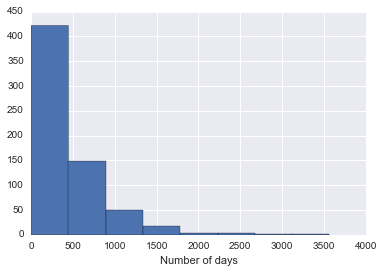

In [43]:
graph_hist(passing_engagement, 'total_minutes_visited')
#plt.hist(sum_grouped_items(group_data(passing_engagement,'account_key'),'total_minutes_visited').values())

In [ ]:
graph_hist(non_passing_engagement, 'total_minutes_visited')
#plt.hist(sum_grouped_items(group_data(non_passing_engagement,'account_key'),'total_minutes_visited').values())

In [ ]:
comparing_pass_non_pass('lessons_completed')


In [ ]:
plt.hist(sum_grouped_items(group_data(passing_engagement,'account_key'),'lessons_completed').values())

In [ ]:
plt.hist(sum_grouped_items(group_data(non_passing_engagement,'account_key'),'lessons_completed').values())

In [ ]:
comparing_pass_non_pass('has_visited')

In [ ]:
plt.hist(sum_grouped_items(group_data(passing_engagement,'account_key'),'has_visited').values())

In [ ]:
plt.hist(sum_grouped_items(group_data(non_passing_engagement,'account_key'),'has_visited').values())